# IMC UTUC Data Compartment Classification using UTAG


## Loading Libraries

In [14]:
cd ~/imc-graph/utag

C:\Users\jkim0\imc-graph\utag


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import seaborn as sns
from IPython.display import display
from utag.segmentation import UTAG, evaluate_performance

sc.settings.set_figure_params(dpi=100, dpi_save=300, fontsize=6)

Warning, OS could not be easily identified. Using default dir ~/.utag to store resources but that might not work!


In [4]:
cd ~/imc-graph/imc_utuc/

C:\Users\jkim0\imc-graph\imc_utuc


In [9]:
adata = sc.read("data/utuc_preprocessed.h5ad")

## UTAG Processing

In [ ]:
%%time
results = UTAG(
    adata,
    slide_key="roi",
    max_dist=20,
    normalization_mode="l1_norm",
    apply_clustering=True,
    apply_umap=False,
    parc_pcs=20,
    clustering_method="parc",
)

# Analysis of UTAG Results

In [15]:
var_order = [
    "AlphaSMA(Pr141)",
    "ColtypeI(Tm169)",
    "Vimentin(Nd143)",
    "CD16(Nd146)",
    "CD68(Tb159)",
    "CD206(Nd144)",
    "CD163(Sm147)",
    "CD11b(Sm149)",
    "CD11c(Yb176)",
    "CD31(Eu151)",
    "CD3(Er170)",
    "CD4(Gd156)",
    "CD8a(Dy162)",
    "CD45(Sm152)",
    "CD45RO(Yb173)",
    "FoxP3(Gd155)",
    "CD20(Dy161)",
    "PanKeratinC11(Nd148)",
    "GATA3(Eu153)",
    "ECadherin(Gd158)",
    "KRT5(Dy163)",
    "PD1(Nd150)",
    "PDL1(Lu175)",
    "GranzymeB(Er167)",
    "Ki67(Er168)",
    "DNA",
]

adata = sc.read("data/UTUC_expression_parc_labelled.h5ad")
results = sc.read("data/UTUC_UTAG_expression_parc_labelled.h5ad")
adata.obs["UTAG Label_parc_1.0"] = results.obs["UTAG Label_parc_1.0"]

## Labeling UTAG Results

In [ ]:
UTAG_parc_1_mapper = {
    0: "Vessels",
    1: "Tumor (Negative)",
    2: "Tumor (Ki67)",
    3: "Tumor (PanCK, GATA3, ECad, KRT5)",
    4: "Tumor (PanCK, GATA3, ECad)",
    5: "Stromal Immune Cells",
    6: "Vessels",
    7: "Tumor (KRT5)",
    8: "Tumor (PanCK, GATA3, ECad)",
    9: "Tumor (GATA3, ECad, KRT5)\nImmune Cells",
    10: "Stromal Macrophages",
    11: "Stromal Macrophages",
    12: "Tumor (PanCK, GATA3, ECad, KRT5)",
    13: "Tumor (PanCK, GATA3, ECad, KRT5)",
    14: "Tumor/Stroma (Interface)\nImmune Cells",
    15: "Tumor (PanCK, ECad)\nImmune Cells",
    16: "Tumor Macrophages",
    17: "Stromal Immune Cells",
    18: "Stromal Macrophages",
    19: "Tumor (GATA3, Ki67)",
    20: "Stromal Immune Cells",
    21: "Stromal Immune Cells",
    22: "Tumor (PanCK)",
    23: "Tumor (KRT5)",
    24: "Stromal Immune Cells",
    25: "Tumor (ECad, KRT5)",
    26: "Tumor (PanCK)",
    27: "Stromal Immune Cells",
    28: "Tumor (Negative)",
    29: "Tumor (Negative)",
    30: "Tumor (PanCK, GATA3, ECad, KRT5, Ki67)\nImmune Cells",
    31: "Tumor (PanCK, GATA3, ECad, KRT5, Ki67)\nImmune Cells",
    32: "Stromal CD4 T Cells",
    33: "Vessels",
    34: "Tumor (ECad)\nImmune Cells",
}

adata.obs["UTAG Label"] = pd.Categorical(
    results.obs["UTAG Label_parc_1.0"].replace(UTAG_parc_1_mapper)
)
results.obs["UTAG Label"] = adata.obs["UTAG Label"]

import seaborn as sns

label1 = "UTAG Label"
label2 = "UTAG Label"
color1 = label1 + "_colors"
color2 = label2 + "_colors"
# import
# results.uns['GATDU Label_colors'] = sns.color_palette().as_hex()
adata.uns[color1] = np.array(
    sns.color_palette("tab10").as_hex()
    + sns.color_palette("tab20b").as_hex()
    + sns.color_palette("tab20c").as_hex()
).astype("object")
results.uns[color2] = np.array(
    sns.color_palette("tab10").as_hex()
    + sns.color_palette("tab20b").as_hex()
    + sns.color_palette("tab20c").as_hex()
).astype("object")

adata.uns[color1] = adata.uns[color1][: adata.obs[label1].unique().shape[0]]
results.uns[color2] = results.uns[color2][: results.obs[label2].unique().shape[0]]

## Visualization of Expression Levels in UTAG Clusters

In [17]:
adata.obs["UTAG Label"] = results.obs["UTAG Label"]
sc.pl.matrixplot(
    adata,
    var_names=var_order,
    groupby="UTAG Label",
    cmap="viridis",
    vmin=0,
    vmax=1,
    save="UTAG Label_labelled_matrix.pdf",
    show=False,
)

{'mainplot_ax': <AxesSubplot:>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

In [ ]:
adata.write("UTUC_expression_parc_labelled.h5ad")
results.write("UTUC_UTAG_expression_parc_labelled.h5ad")

# Tumor vs Stroma Benchmarking

In [22]:
df = pd.read_csv("data/utuc_domain_annotation.per_cell.csv")

In [185]:
df

,sample,roi,obj_id,domain_id,topological_domain,S,T
0,20200914_PM1123,20200914_PM1123-01,7,S1,S,True,False
1,20200914_PM1123,20200914_PM1123-01,9,S1,S,True,False
2,20200914_PM1123,20200914_PM1123-01,11,S1,S,True,False
3,20200914_PM1123,20200914_PM1123-01,13,S1,S,True,False
4,20200914_PM1123,20200914_PM1123-01,14,S1,S,True,False
...,...,...,...,...,...,...,...
197049,20210310_PM57_B8,20210310_PM57_B8-02,6870,T2,T,False,True
197050,20210310_PM57_B8,20210310_PM57_B8-02,6873,S1,S,True,False
197051,20210310_PM57_B8,20210310_PM57_B8-02,6877,S1,S,True,False
197052,20210310_PM57_B8,20210310_PM57_B8-02,6881,S1,S,True,False


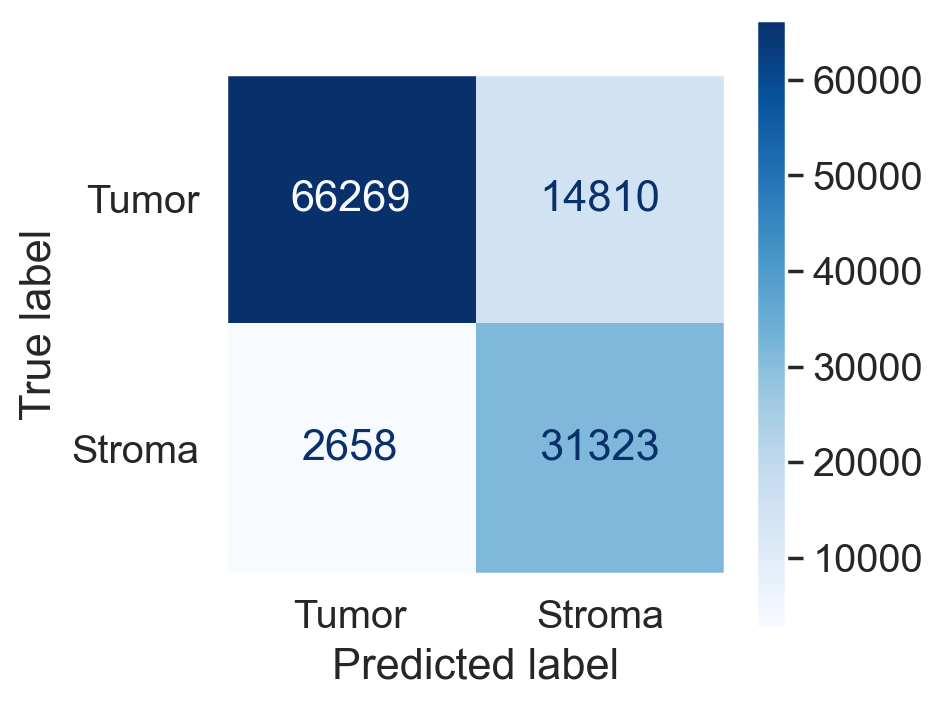

In [23]:
import matplotlib as mpl

UTAG_parc_1_mapper_broad = {
    0: "Stroma",
    1: "Tumor",
    2: "Tumor",
    3: "Tumor",
    4: "Tumor",
    5: "Stroma",
    6: "Stroma",
    7: "Tumor",
    8: "Tumor",
    9: "Tumor",
    10: "Stroma",
    11: "Stroma",
    12: "Tumor",
    13: "Tumor",
    14: "Stroma",
    15: "Tumor",
    16: "Tumor",
    17: "Stroma",
    18: "Stroma",
    19: "Tumor",
    20: "Stroma",
    21: "Stroma",
    22: "Tumor",
    23: "Tumor",
    24: "Stroma",
    25: "Tumor",
    26: "Tumor",
    27: "Stroma",
    28: "Tumor",
    29: "Tumor",
    30: "Tumor",
    31: "Tumor",
    32: "Stroma",
    33: "Stroma",
    34: "Tumor",
}

cat_order = [
    "Stroma",
    "Tumor"
]

adata.obs["UTAG Label_broad"] = pd.Categorical(
    results.obs["UTAG Label_parc_1.0"].replace(UTAG_parc_1_mapper_broad),
    categories=cat_order,
)

benchmark_df = adata.obs.merge(df, on=["sample", "roi", "obj_id"])[
    [
        "sample",
        "roi",
        "obj_id",
        "UTAG Label_broad",
        "topological_domain",
        "cell_type_broad",
    ]
]
benchmark_df["Annotation"] = benchmark_df["topological_domain"].replace(
    {"S": "Stroma", "T": "Tumor"}
)

from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

cm = confusion_matrix(
    benchmark_df["Annotation"],
    benchmark_df["UTAG Label_broad"],
    labels=["Tumor", "Stroma"],
)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tumor", "Stroma"])
sns.set(font_scale=1.3)

disp.plot(cmap="Blues")
plt.grid(False)
plt.savefig("figures/utuc_Tumor vs Stroma Confusion Matrix.pdf")
plt.show()

clf_report = classification_report(
    benchmark_df["Annotation"],
    benchmark_df["UTAG Label_broad"],
    target_names=["Tumor", "Stroma"],
    output_dict=True,
)
# .iloc[:-1, :] to exclude support

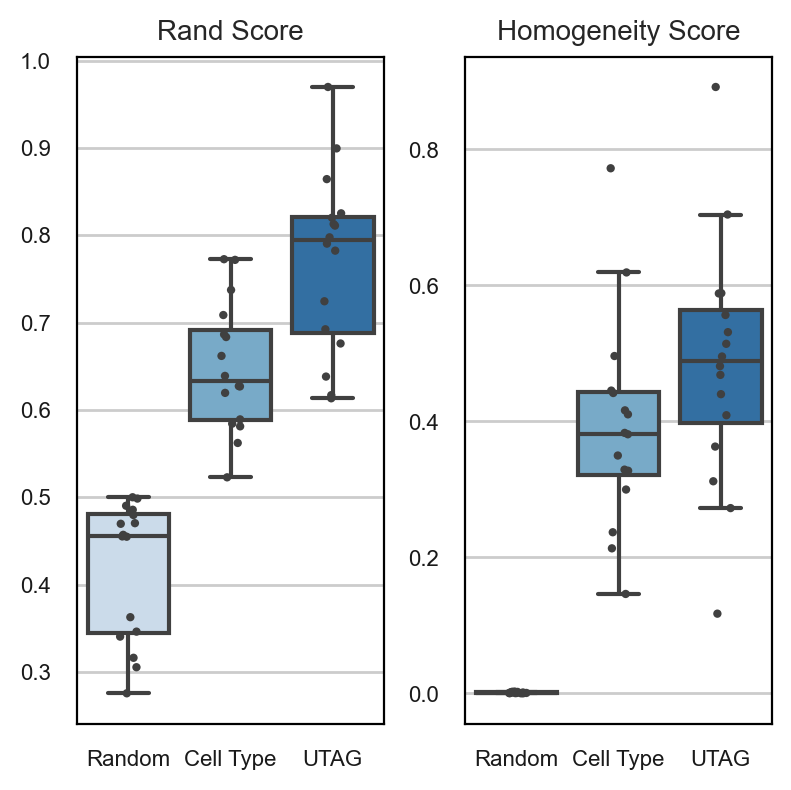

In [27]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(12345)

from sklearn.metrics import homogeneity_score, jaccard_score, rand_score

random_rand_score_list = []
random_homogeneity_score_list = []

rand_score_celltype_list = []
rand_score_utag_list = []

homogeneity_score_celltype_list = []
homogeneity_score_utag_list = []

for key in benchmark_df["roi"].unique():
    batch = benchmark_df[benchmark_df["roi"] == key]

    rints = rng.integers(
        low=0, high=len(batch["cell_type_broad"].unique()), size=len(batch)
    ).astype(str)

    random_rand_score = rand_score(batch["topological_domain"], rints)
    random_homogeneity_score = homogeneity_score(batch["topological_domain"], rints)

    random_rand_score_list.append(random_rand_score)
    random_homogeneity_score_list.append(random_homogeneity_score)

    rand_score_celltype = rand_score(
        batch["topological_domain"], batch["cell_type_broad"]
    )
    homogeneity_score_celltype = homogeneity_score(
        batch["topological_domain"], batch["cell_type_broad"]
    )

    rand_score_celltype_list.append(rand_score_celltype)
    homogeneity_score_celltype_list.append(homogeneity_score_celltype)

    rand_score_utag = rand_score(batch["topological_domain"], batch["UTAG Label_broad"])
    homogeneity_score_utag = homogeneity_score(
        batch["topological_domain"], batch["UTAG Label_broad"]
    )

    rand_score_utag_list.append(rand_score_utag)
    homogeneity_score_utag_list.append(homogeneity_score_utag)

import seaborn as sns
from sklearn.metrics import homogeneity_score, rand_score

rand_score_df = pd.DataFrame(
    {
        "Random": random_rand_score_list,
        "Cell Type": rand_score_celltype_list,
        "UTAG": rand_score_utag_list,
    }
)
homogeneity_score_df = pd.DataFrame(
    {
        "Random": random_homogeneity_score_list,
        "Cell Type": homogeneity_score_celltype_list,
        "UTAG": homogeneity_score_utag_list,
    }
)

sc.settings.set_figure_params(dpi=100, dpi_save=300, fontsize=8)
plt.figure(figsize=(4, 4), dpi=100)
# plt.suptitle('Scoring Against Experts', fontsize = 12, x = 0.54, y = 0.98)
plt.subplot(1, 2, 1)
sns.boxplot(data=rand_score_df, palette="Blues", fliersize=0)
sns.stripplot(data=rand_score_df, color="0.25", s=3)
plt.title("Rand Score", fontsize=10)
plt.subplot(1, 2, 2)
sns.boxplot(data=homogeneity_score_df, palette="Blues", fliersize=0)
sns.stripplot(data=homogeneity_score_df, color="0.25", s=3)
plt.title("Homogeneity Score", fontsize=10)
plt.tight_layout()
plt.savefig("figures/utuc_performance.pdf")
plt.show()

In [28]:
import pingouin as pg

print("Rand Score: Random vs UTAG")
display(
    pg.mwu(x=rand_score_df["Random"], y=rand_score_df["UTAG"], alternative="two-sided")
)
print("Rand Score: Cell Type vs UTAG")
display(
    pg.mwu(
        x=rand_score_df["Cell Type"], y=rand_score_df["UTAG"], alternative="two-sided"
    )
)
print("Homogeneity Score: Random vs UTAG")
display(
    pg.mwu(
        x=homogeneity_score_df["Random"],
        y=homogeneity_score_df["UTAG"],
        alternative="two-sided",
    )
)
print("Homogeneity Score: Cell Type vs UTAG")
display(
    pg.mwu(
        x=homogeneity_score_df["Cell Type"],
        y=homogeneity_score_df["UTAG"],
        alternative="two-sided",
    )
)

Rand Score: Random vs UTAG


,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.000002,1.0,0.0


Rand Score: Cell Type vs UTAG


,U-val,alternative,p-val,RBC,CLES
MWU,43.0,two-sided,0.001449,0.664062,0.167969


Homogeneity Score: Random vs UTAG


,U-val,alternative,p-val,RBC,CLES
MWU,0.0,two-sided,0.000002,1.0,0.0


Homogeneity Score: Cell Type vs UTAG


,U-val,alternative,p-val,RBC,CLES
MWU,82.0,two-sided,0.086374,0.359375,0.320312
